# Random Ballistic Deposition

Simulation of random ballistic deposition for surface growth modeling. Studies interface roughening, scaling laws, and kinetic surface formation processes.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [107]:
x = 10000 * 3
L = 200
line     = np.zeros(L) 
myBottom = np.zeros(L) 
T     = np.arange(x)
h_av  = np.zeros(x)
h2_av = np.zeros(x)
w     = np.zeros(x)

color = np.array(['darkorange', 'chartreuse'])


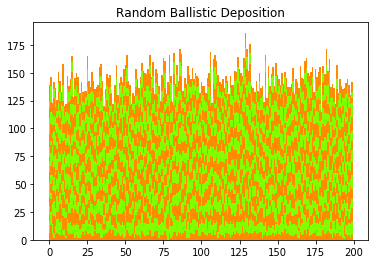

In [108]:
for t in T:
    c = int(t/(10 * L))%2

    i = int(random.random() * 200)
    line[i]  = line[i] + 1
    #Mianging h faghat az anja ke dar soal khaste shode amade va ella niazi be an naboode pas az in ham mohasebe nashode ast
    #roshd an ba zaman khatti ast...
    h_av[t]  = np.mean(line)
    h2_av[t] = np.mean(line ** 2)
    w[t]     = np.sqrt(h2_av[t]-h_av[t] ** 2)
    
    if t%1000 == 0:
        plt.bar(np.arange(L), line-myBottom, bottom = myBottom, width = 1, color = color[c])
        myBottom = np.copy(line)

plt.title("Random Ballistic Deposition")
plt.savefig('velnesh.png')
plt.show()  

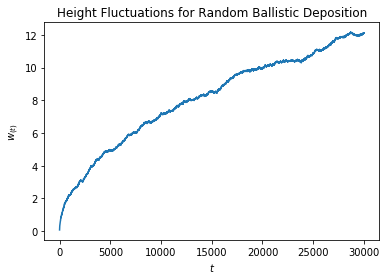

In [160]:
plt.plot(T, np.sqrt(h2_av-h_av ** 2))
plt.title("Height Fluctuations for Random Ballistic Deposition")
plt.ylabel("$w_{(t)}$")
plt.xlabel("$t$")
plt.savefig('w.png')

Text(0.5, 0, '$log(t)$')

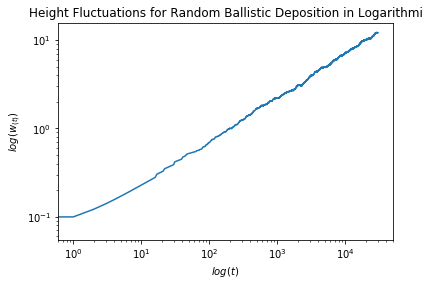

In [114]:
plt.loglog(w)
plt.title("Height Fluctuations for Random Ballistic Deposition in Logarithmi")
plt.ylabel("$log(w_{(t)})$")
plt.xlabel("$log(t)$")

In [150]:
#finding beta

beta = np.polyfit(np.log(T[1:]),np.log(w[1:]),1)
print("\u03B2 =", np.round(beta[0], 4))
print(beta)

β = 0.5019
[ 0.5018608  -2.67535962]


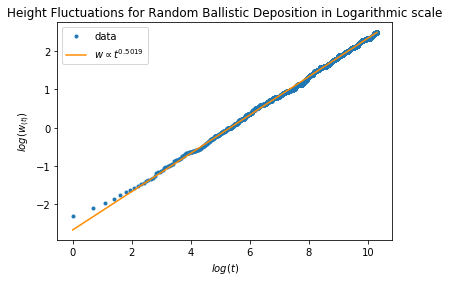

In [159]:
plt.plot(np.log(T[1:]), np.log(w[1:]), '.', label = 'data')
plt.title("Height Fluctuations for Random Ballistic Deposition in Logarithmic scale")
plt.ylabel("$log(w_{(t)})$")
plt.xlabel("$log(t)$")
plt.plot(np.log(T[1:]), beta[0] * np.log(T[1:]) + beta[1], c = 'darkorange', label = '$w \propto t^{0.5019}$')
plt.legend()
plt.savefig('beta.png')